In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# configurations
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 15
colors = ["#003560", "#EF4700", "#EFB400", "#00B917", "#72009F"]

In [6]:
# helper functions
def format_plot(xtick_labels, rotate_xtick_labels, label_x, label_y):
    if rotate_xtick_labels:
        plt.xticks(np.arange(len(xtick_labels)), xtick_labels, rotation=45, ha="right")
    else:
        plt.xticks(np.arange(len(xtick_labels)), xtick_labels, rotation=0)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

def save_plot(filename):
    plt.tight_layout()
    plt.savefig("../paper/fig/" + filename)

In [7]:
# load data
step1 = pd.read_csv("../survey_tool/data/results/full_study/step1.csv")
step4 = pd.read_csv("../survey_tool/data/results/full_study/step4.csv")
test_persons = pd.read_csv("../survey_tool/data/results/full_study/test_persons.csv")

In [8]:
# Create dict with user_id, a
data_dict = {}
for index, row in step1.iterrows():
    if row["user_id"] not in data_dict:
        test_person = test_persons[test_persons.user_id==row["user_id"]]
        data_dict[row["user_id"]] = {"correct_classifications_step1": 0,\
                                     "wrong_classifications_step1" : 0,\
                                     "mal_as_ben_step1": 0,\
                                     "ben_as_mal_step1": 0,\
                                     "correct_classifications_step4": 0,\
                                     "wrong_classifications_step4": 0,\
                                     "mal_as_ben_step4": 0,\
                                     "ben_as_mal_step4": 0,\
                                     "gender": test_person.gender.values[0],\
                                     "origin": test_person.origin.values[0],\
                                     "age": test_person.age.values[0],\
                                     "phishing": test_person.phishing.values[0]}
    if row["classification"] == row["result"]:
        data_dict[row["user_id"]]["correct_classifications_step1"] += 1
    else:
        data_dict[row["user_id"]]["wrong_classifications_step1"] += 1
    if row["classification"] == 1 and row["classification"] != row["result"]:
        data_dict[row["user_id"]]["mal_as_ben_step1"] += 1
    if row["classification"] == 0 and row["classification"] != row["result"]:
        data_dict[row["user_id"]]["ben_as_mal_step1"] += 1

for index, row in step4.iterrows():
    if row["classification"] == row["result"]:
        data_dict[row["user_id"]]["correct_classifications_step4"] += 1
    else:
        data_dict[row["user_id"]]["wrong_classifications_step4"] += 1
    if row["classification"] == 1 and row["classification"] != row["result"]:
        data_dict[row["user_id"]]["mal_as_ben_step4"] += 1
    if row["classification"] == 0 and row["classification"] != row["result"]:
        data_dict[row["user_id"]]["ben_as_mal_step4"] += 1

data = []
for user_id, values in data_dict.items():
    if (values["correct_classifications_step1"] + values["wrong_classifications_step1"]) > 0 and\
       (values["correct_classifications_step4"] + values["wrong_classifications_step4"]) > 0:
        ben_as_mal_step1 = 0
        ben_as_mal_step4 = 0
        mal_as_ben_step1 = 0
        mal_as_ben_step4 = 0
        correct_classifications_step1 = 0
        correct_classifications_step4 = 0
        if values["wrong_classifications_step1"] != 0:
            ben_as_mal_step1 = values["ben_as_mal_step1"]/values["wrong_classifications_step1"]
            mal_as_ben_step1 = values["mal_as_ben_step1"]/values["wrong_classifications_step1"]
        if values["wrong_classifications_step4"] != 0:
            ben_as_mal_step4 = values["ben_as_mal_step4"]/values["wrong_classifications_step4"]
            mal_as_ben_step4 = values["mal_as_ben_step4"]/values["wrong_classifications_step4"]
        if (values["correct_classifications_step1"] + values["wrong_classifications_step1"]) > 0:
            correct_classifications_step1 = values["correct_classifications_step1"]/(values["correct_classifications_step1"] + values["wrong_classifications_step1"])
        if (values["correct_classifications_step4"] + values["wrong_classifications_step4"]) > 0:
            correct_classifications_step4 = values["correct_classifications_step4"]/(values["correct_classifications_step4"] + values["wrong_classifications_step4"])
        data.append((user_id,\
                     correct_classifications_step1,\
                     correct_classifications_step4,\
                     values["correct_classifications_step4"] > values["correct_classifications_step1"],
                     ben_as_mal_step1,\
                     ben_as_mal_step4,\
                     mal_as_ben_step1,\
                     mal_as_ben_step4,\
                     values["gender"],\
                     values["origin"],\
                     values["age"],\
                     values["phishing"]))
step1_step4 = pd.DataFrame(data, columns=["user_id",\
                                          "accuracy_step1",\
                                          "accuracy_step4",\
                                          "improvement",\
                                          "ben_as_mal_step1",\
                                          "ben_as_mal_step4",\
                                          "mal_as_ben_step1",\
                                          "mal_as_ben_step4",\
                                          "gender",\
                                          "origin",\
                                          "age",\
                                          "phishing"])

# All users

In [9]:
# Comparison of number of correct classifications in step 1 and step 4
step1_step4["improvement"].value_counts()

True     206
False     81
Name: improvement, dtype: int64

In [10]:
# Number of participants who improved or deteriorated their score
increase_count = len(step1_step4[step1_step4.accuracy_step4 > step1_step4.accuracy_step1].index)
decrease_count = len(step1_step4[step1_step4.accuracy_step4 <= step1_step4.accuracy_step1].index)
print(increase_count)
print(decrease_count)

158
129


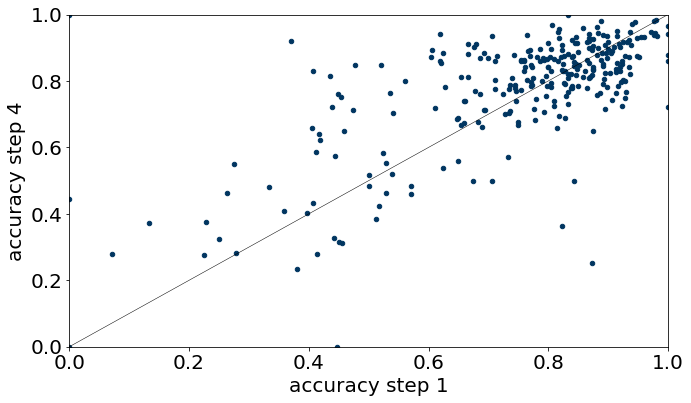

In [11]:
# Comparison of correct classifications in step 1 (x-axis) and step 4 (y-axis)
step1_step4.plot(kind="scatter",
                 x="accuracy_step1",
                 y="accuracy_step4",
                 xlim=(0.0,1.0),
                 ylim=(0.0,1.0),
                 c=colors[0])
plt.plot([0,1], [0,1], c="black", linewidth=0.5)
labels = ("0.0", "0.2", "0.4", "0.6", "0.8", "1.0")
plt.xlabel("accuracy step 1")
plt.ylabel("accuracy step 4")
save_plot("step1_step4_comparison.pdf")

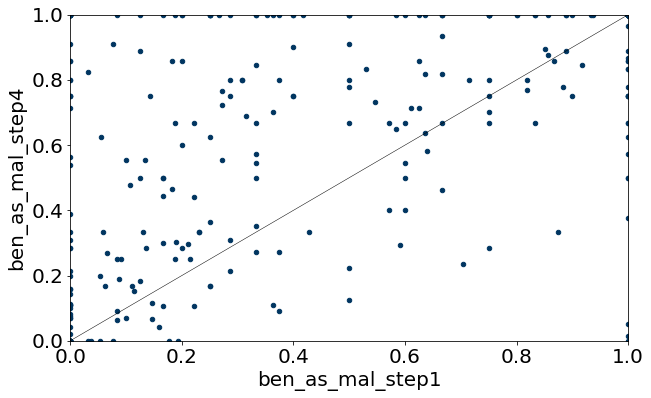

In [12]:
# Comparison of benign as malicious classifications in step 1 (x-axis) and step 4 (y-axis)
step1_step4.plot(kind="scatter",
                 x="ben_as_mal_step1",
                 y="ben_as_mal_step4",
                 xlim=(0.0,1.0),
                 ylim=(0.0,1.0),
                 c=colors[0])
plt.plot([0,1], [0,1], c="black", linewidth=0.5)

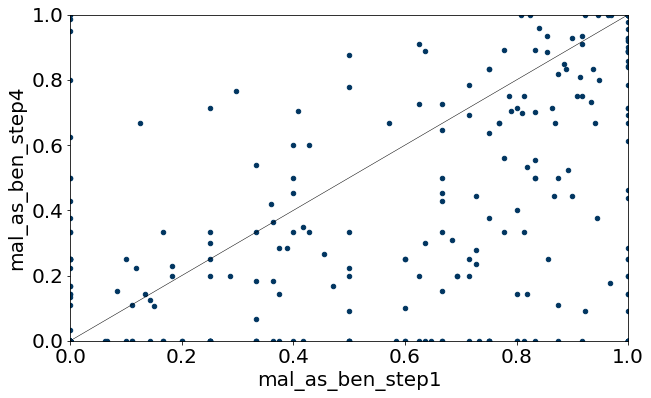

In [13]:
# Comparison of malicious as benign classifications in step 1 (x-axis) and step 4 (y-axis)
step1_step4.plot(kind="scatter",
                 x="mal_as_ben_step1",
                 y="mal_as_ben_step4",
                 xlim=(0.0,1.0),
                 ylim=(0.0,1.0),
                 c=colors[0])
plt.plot([0,1], [0,1], c="black", linewidth=0.5)

# Based on Categories

In [14]:
increase_count = 0
decrease_count = 0
for index, row in step1_step4[step1_step4.phishing=="yes"].iterrows():
    if row["accuracy_step4"] > row["accuracy_step1"]:
        increase_count += 1
    else:
        decrease_count += 1
print(increase_count)
print(decrease_count)

17
23


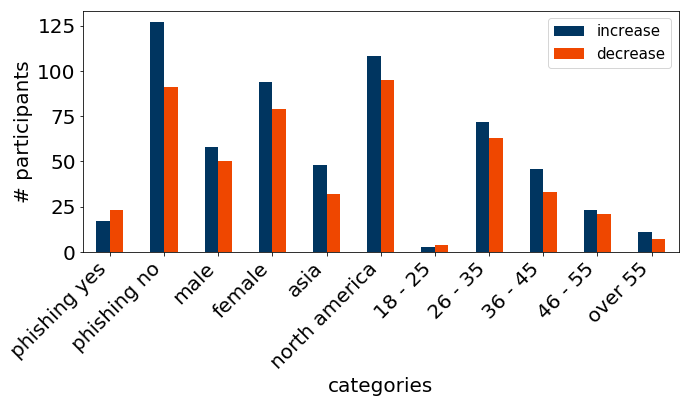

In [15]:
participants_inc = step1_step4[step1_step4["accuracy_step4"] >\
                               step1_step4["accuracy_step1"]]
participants_dec = step1_step4[step1_step4["accuracy_step4"] <=\
                               step1_step4["accuracy_step1"]]
phishing_yes_inc = len(participants_inc[participants_inc["phishing"]=="yes"].index)
phishing_yes_dec = len(participants_dec[participants_dec["phishing"]=="yes"].index)
phishing_no_inc = len(participants_inc[participants_inc["phishing"]=="no"].index)
phishing_no_dec = len(participants_dec[participants_dec["phishing"]=="no"].index)
female_inc = len(participants_inc[participants_inc["gender"]=="female"].index)
female_dec = len(participants_dec[participants_dec["gender"]=="female"].index)
male_inc = len(participants_inc[participants_inc["gender"]=="male"].index)
male_dec = len(participants_dec[participants_dec["gender"]=="male"].index)
asia_inc = len(participants_inc[participants_inc["origin"]=="asia"].index)
asia_dec = len(participants_dec[participants_dec["origin"]=="asia"].index)
north_america_inc = len(participants_inc[participants_inc["origin"]=="north_america"].index)
north_america_dec = len(participants_dec[participants_dec["origin"]=="north_america"].index)
age_18_25_inc = len(participants_inc[participants_inc["age"]=="18_25"].index)
age_18_25_dec = len(participants_dec[participants_dec["age"]=="18_25"].index)
age_26_35_inc = len(participants_inc[participants_inc["age"]=="26_35"].index)
age_26_35_dec = len(participants_dec[participants_dec["age"]=="26_35"].index)
age_36_45_inc = len(participants_inc[participants_inc["age"]=="36_45"].index)
age_36_45_dec = len(participants_dec[participants_dec["age"]=="36_45"].index)
age_46_55_inc = len(participants_inc[participants_inc["age"]=="46_55"].index)
age_46_55_dec = len(participants_dec[participants_dec["age"]=="46_55"].index)
age_over_55_inc = len(participants_inc[participants_inc["age"]=="over_55"].index)
age_over_55_dec = len(participants_dec[participants_dec["age"]=="over_55"].index)
pd.DataFrame([(phishing_yes_inc, phishing_yes_dec),\
              (phishing_no_inc, phishing_no_dec),\
              (female_inc, female_dec),\
              (male_inc, male_dec),\
              (asia_inc, asia_dec),\
              (north_america_inc, north_america_dec),\
              (age_18_25_inc, age_18_25_dec),\
              (age_26_35_inc, age_26_35_dec),\
              (age_36_45_inc, age_36_45_dec),\
              (age_46_55_inc, age_46_55_dec),\
              (age_over_55_inc, age_over_55_dec)],\
              columns=["increase", "decrease"],\
              index=["phishing yes", "phishing no", "female", "male", "asia", "north america", "18 25",\
                     "26 - 35", "36 - 45", "46 - 55", "over 55"]).plot(kind="bar", color=colors)
labels = ("phishing yes", "phishing no", "male", "female", "asia", "north america", "18 - 25", "26 - 35",\
          "36 - 45", "46 - 55", "over 55")
format_plot(labels, True, "categories", "# participants")
save_plot("step1_step4_comparison_categories.pdf")

In [18]:
#Statistical tests for the numbered variables 
import scipy as sp
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues


correlation    = step1_step4.corr(method="pearson");

print("Pearson correlation coefficient:");
print(correlation);

print("p-values for each correlation")
calculate_pvalues(step1_step4)

 

Pearson correlation coefficient:
                  accuracy_step1  accuracy_step4  improvement  \
accuracy_step1          1.000000        0.681585    -0.148602   
accuracy_step4          0.681585        1.000000     0.158275   
improvement            -0.148602        0.158275     1.000000   
ben_as_mal_step1        0.518739        0.364226    -0.201344   
ben_as_mal_step4        0.600835        0.615130     0.045445   
mal_as_ben_step1       -0.575055       -0.387859     0.232496   
mal_as_ben_step4       -0.571334       -0.644102    -0.057844   

                  ben_as_mal_step1  ben_as_mal_step4  mal_as_ben_step1  \
accuracy_step1            0.518739          0.600835         -0.575055   
accuracy_step4            0.364226          0.615130         -0.387859   
improvement              -0.201344          0.045445          0.232496   
ben_as_mal_step1          1.000000          0.524903         -0.939749   
ben_as_mal_step4          0.524903          1.000000         -0.542977   
ma

,accuracy_step1,accuracy_step4,improvement,ben_as_mal_step1,ben_as_mal_step4,mal_as_ben_step1,mal_as_ben_step4
accuracy_step1,0,0,0.0117,0,0,0,0
accuracy_step4,0,0,0.0072,0,0,0,0
improvement,0.0117,0.0072,0,0.0006,0.4431,0.0001,0.3288
ben_as_mal_step1,0,0,0.0006,0,0,0,0
ben_as_mal_step4,0,0,0.4431,0,0,0,0
mal_as_ben_step1,0,0,0.0001,0,0,0,0
mal_as_ben_step4,0,0,0.3288,0,0,0,0


In [22]:
# Statistical test (Chi-Square) for categorical values (the demographics)
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

chisq_of_df_cols(step1_step4, 'origin', 'phishing')

#TODO: also use SEBIS here

(17.63419363416204,
 0.02414257541864859,
 8,
 array([[7.59581882e-01, 6.07665505e+01, 7.59581882e-01, 1.51916376e+00,
         1.54195122e+02],
        [1.01045296e-01, 8.08362369e+00, 1.01045296e-01, 2.02090592e-01,
         2.05121951e+01],
        [1.39372822e-01, 1.11498258e+01, 1.39372822e-01, 2.78745645e-01,
         2.82926829e+01]]))